In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np


In [3]:
DEFAULT_CRS = "EPSG:4326"

In [7]:
censu_gpd = gpd.read_file("../../data/raw/SC2010_CEM_RMSAO_V4")

In [8]:
censu_gpd.head()

,ID,AREA,DATA,SC_2010,SC_2010_CH,AP_2010,AP_2010_CH,SC_2000,SC_2000_CH,COD_GR,...,BA_007,BA_009,BA_011,AREA_KM2,DENS_KM2,SITUA1_201,SITUA_2_20,TIPO_2016,TIPO_2_201,geometry
0,2895191,14.88,602,3.546801e+14,354680105000064,3546801003001,3546801003001,3.546801e+14,354680105000064,3,...,1195.91,578.19,991.61,14.881440,26,8.0,RURAL,0,N,"POLYGON ((-46.17788 -23.35886, -46.17866 -23.3..."
1,2905077,13.30,1082,3.530607e+14,353060705000181,3530607005007,3530607005007,3.530607e+14,353060705000160,3,...,1042.77,574.84,907.13,13.298441,58,8.0,RURAL,0,N,"POLYGON ((-46.21148 -23.37766, -46.21124 -23.3..."
2,2894895,9.65,1081,3.530607e+14,353060705000180,3530607005007,3530607005007,3.530607e+14,353060705000159,3,...,865.09,413.37,704.50,9.645352,41,8.0,RURAL,0,N,"POLYGON ((-46.21148 -23.37766, -46.21119 -23.3..."
3,2905096,6.10,1083,3.530607e+14,353060705000182,3530607005007,3530607005007,3.530607e+14,353060705000161,3,...,1754.07,893.20,1335.42,6.101509,58,8.0,RURAL,0,N,"POLYGON ((-46.17788 -23.35886, -46.17665 -23.3..."
4,2905155,1.23,603,3.530607e+14,353060705000164,3530607005007,3530607005007,3.530607e+14,353060705000149,3,...,876.96,429.70,763.29,1.225181,515,3.0,URBANO,0,N,"POLYGON ((-46.15525 -23.36233, -46.15625 -23.3..."


In [9]:
censu_gpd = censu_gpd[censu_gpd['NOM_MI'] == 'SAO PAULO']

In [14]:
censu_gpd["SITUA2"]

60       URBANO
61       URBANO
62       URBANO
63       URBANO
64       URBANO
          ...  
30567    URBANO
30568    URBANO
30569    URBANO
30570    URBANO
30571    URBANO
Name: SITUA2, Length: 22829, dtype: object

Read tables values

In [15]:
variables = pd.read_excel("../../data/raw/SC2010_CEM_RMSAO_V4/SC2010_CEM_RMSAO.xlsx", usecols=["CODSETOR", "CODSETTX", "COD_RM", "NOM_RM", "D1_012", "D1_017", "D1_035", "D1_044", "BA_001"])

In [16]:
variables.head()

,CODSETOR,CODSETTX,COD_RM,NOM_RM,BA_001,D1_012,D1_017,D1_035,D1_044
0,350390105000001,350390105000001,20,RM SAO PAULO,109.0,109.0,107.0,109.0,109.0
1,350390105000002,350390105000002,20,RM SAO PAULO,151.0,151.0,151.0,151.0,151.0
2,350390105000003,350390105000003,20,RM SAO PAULO,175.0,175.0,169.0,175.0,175.0
3,350390105000004,350390105000004,20,RM SAO PAULO,238.0,234.0,216.0,238.0,238.0
4,350390105000005,350390105000005,20,RM SAO PAULO,106.0,106.0,93.0,106.0,106.0


In [17]:
variables[variables['CODSETOR'] == 355030863000234]

,CODSETOR,CODSETTX,COD_RM,NOM_RM,BA_001,D1_012,D1_017,D1_035,D1_044
23677,355030863000234,355030863000234,20,RM SAO PAULO,82.0,82.0,82.0,82.0,82.0


In [18]:
variables.sort_values(by="D1_012").iloc[range(100)]['D1_012']

5759     0.0
21710    0.0
5899     0.0
11131    0.0
11134    0.0
        ... 
22183    0.0
2933     0.0
22184    0.0
22186    0.0
22190    0.0
Name: D1_012, Length: 100, dtype: float64

In [19]:
variables.dtypes

CODSETOR      int64
CODSETTX      int64
COD_RM        int64
NOM_RM       object
BA_001      float64
D1_012      float64
D1_017      float64
D1_035      float64
D1_044      float64
dtype: object

In [20]:
censu_gpd = (censu_gpd
             .join(variables[['CODSETOR', 'D1_012', 'D1_017', 'D1_035', 'D1_044']].set_index("CODSETOR"),
                    how='left',
                    on='SC_2010'
                )
            )

# Applying Dasymetric Mapping
- Apply a dasymetric mapping using regions doesn't have CNEFE data

In [22]:
cnefe_hex = gpd.read_file("../../data/hex_agg_cnef_sp.gpkg")

In [23]:
if censu_gpd.crs != DEFAULT_CRS:
    censu_gpd = censu_gpd.to_crs(DEFAULT_CRS)
if cnefe_hex.crs != DEFAULT_CRS:
    cnefe_hex = cnefe_hex.to_crs(DEFAULT_CRS)

In [24]:
filter_cnefe = ((cnefe_hex['esp_1'] == 0) | (cnefe_hex['esp_1'].isnull()))

<Axes: >

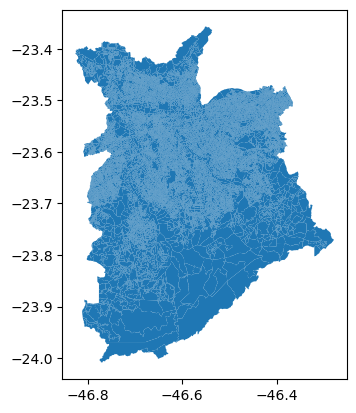

In [25]:
censu_gpd.plot()

In [26]:
censu_gpd_dm = censu_gpd.overlay(cnefe_hex[filter_cnefe], how='difference', keep_geom_type=False)

In [28]:
print(censu_gpd_dm.size)
print(censu_gpd.size)


1094208
1095792


<Axes: >

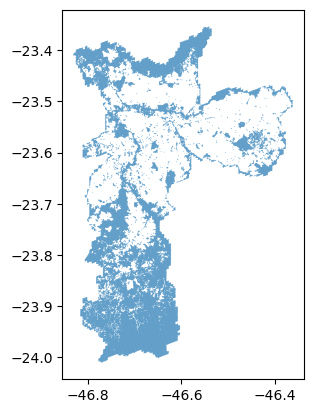

In [29]:
cnefe_hex[filter_cnefe].plot()

<Axes: >

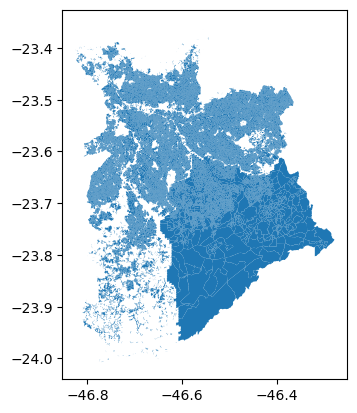

In [30]:
censu_gpd_dm.plot()

# Calculo das variavies

Criar variáveis com as densidades das variavies de acesso 

In [31]:

censu_gpd_dm["area_poly"] = (
    censu_gpd_dm
    .geometry
    .to_crs("EPSG:5641")
    .area).astype(int) # Area may be invalid for a geographic CRS using degrees as units; use GeoSeries.to_crs() to project geometries to a planar CRS before using this function.


In [32]:
def calculate_var_density(gpd, var, area):
    return gpd[var]/gpd[area]

In [34]:

censu_gpd_dm["D1_012_d"] = calculate_var_density(censu_gpd_dm, 'D1_012', 'area_poly')
censu_gpd_dm["D1_017_d"] = calculate_var_density(censu_gpd_dm, 'D1_017', 'area_poly')
censu_gpd_dm["D1_035_d"] = calculate_var_density(censu_gpd_dm, 'D1_035', 'area_poly')
censu_gpd_dm["D1_044_d"] = calculate_var_density(censu_gpd_dm, 'D1_044', 'area_poly')
censu_gpd_dm["BA_001_d"] = calculate_var_density(censu_gpd_dm, 'BA_001', 'area_poly')



In [35]:
censu_gpd_dm.head()

,ID,AREA,DATA,SC_2010,SC_2010_CH,AP_2010,AP_2010_CH,SC_2000,SC_2000_CH,COD_GR,...,D1_012,D1_017,D1_035,D1_044,area_poly,D1_012_d,D1_017_d,D1_035_d,D1_044_d,BA_001_d
0,1037688,0.17,26609,3.550308e+14,355030832000067,3550308005049,3550308005049,3.550308e+14,355030832000067,3,...,95.0,95.0,95.0,95.0,181896,0.000522,0.000522,0.000522,0.000522,0.000522
1,1928880,1.60,27645,3.550308e+14,355030832000011,3550308005049,3550308005049,3.550308e+14,355030832000011,3,...,94.0,94.0,94.0,94.0,338066,0.000278,0.000278,0.000278,0.000278,0.000278
2,1037594,0.08,27910,3.550308e+14,355030832000032,3550308005049,3550308005049,3.550308e+14,355030832000032,3,...,164.0,164.0,164.0,164.0,90625,0.001810,0.001810,0.001810,0.001810,0.001810
3,1037635,0.13,27643,3.550308e+14,355030832000033,3550308005049,3550308005049,3.550308e+14,355030832000033,3,...,164.0,164.0,164.0,164.0,151249,0.001084,0.001084,0.001084,0.001084,0.001084
4,1037652,0.16,27644,3.550308e+14,355030832000034,3550308005049,3550308005049,3.550308e+14,355030832000034,3,...,156.0,156.0,155.0,156.0,184789,0.000844,0.000844,0.000839,0.000844,0.000844


In [36]:
censu_gpd_dm[censu_gpd_dm['SC_2010'] == 355030863000234]

,ID,AREA,DATA,SC_2010,SC_2010_CH,AP_2010,AP_2010_CH,SC_2000,SC_2000_CH,COD_GR,...,D1_012,D1_017,D1_035,D1_044,area_poly,D1_012_d,D1_017_d,D1_035_d,D1_044_d,BA_001_d
5820,1002150,1.47,34536,3.550309e+14,355030863000234,3550308005113,3550308005113,3.550309e+14,355030863000160,3,...,82.0,82.0,82.0,82.0,201532,0.000407,0.000407,0.000407,0.000407,0.000407


In [37]:
censu_gpd[censu_gpd['SC_2010'] == 355030863000234]

,ID,AREA,DATA,SC_2010,SC_2010_CH,AP_2010,AP_2010_CH,SC_2000,SC_2000_CH,COD_GR,...,DENS_KM2,SITUA1_201,SITUA_2_20,TIPO_2016,TIPO_2_201,geometry,D1_012,D1_017,D1_035,D1_044
7262,1002150,1.47,34536,3.550309e+14,355030863000234,3550308005113,3550308005113,3.550309e+14,355030863000160,3,...,192,1.0,URBANO,0,N,"POLYGON ((-46.72778 -23.47530, -46.72778 -23.4...",82.0,82.0,82.0,82.0


Colunas de interesse

In [38]:
censu_gpd_dm = censu_gpd_dm[['ID', 'SC_2010', 'SITUA2','geometry', 'D1_012_d', 'D1_017_d', 'D1_035_d', 'D1_044_d', 'BA_001_d']]

# Lendo H3 

In [42]:
hex_sp = gpd.read_file("../../data/shapeFiles/GRIDS_H3_SP_RES10") 

In [43]:
hex_sp.head()

,id_hex,geometry
0,8aa8100c3257fff,"POLYGON ((-46.63592 -23.53032, -46.63664 -23.5..."
1,8aa8100d2447fff,"POLYGON ((-46.53650 -23.53972, -46.53722 -23.5..."
2,8aa8100e1637fff,"POLYGON ((-46.66886 -23.59437, -46.66958 -23.5..."
3,8aa8100f0827fff,"POLYGON ((-46.59115 -23.61353, -46.59187 -23.6..."
4,8aa81010ec07fff,"POLYGON ((-46.65231 -23.83331, -46.65303 -23.8..."


# Intersect data

In [44]:
if censu_gpd_dm.crs != DEFAULT_CRS:
    censu_gpd_dm = censu_gpd_dm.to_crs(DEFAULT_CRS)
if hex_sp.crs != DEFAULT_CRS:
    hex_sp = hex_sp.to_crs(DEFAULT_CRS)

In [45]:
censu_join_h3 =  censu_gpd_dm.overlay(hex_sp[['id_hex', 'geometry']], how='intersection')


/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geopandas/geodataframe.py:1816: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geopandas/geodataframe.py:2475: UserWarning: `keep_geom_type=True` in overlay resulted in 24639 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


Gerar qnt de cada variável referente a área de recorte do censu nos hexagonos

In [48]:
censu_join_h3["area_poly"] = (
    censu_join_h3
    .geometry
    .to_crs("EPSG:5641")
    .area).astype(int) # Area may be invalid for a geographic CRS using degrees as units; use GeoSeries.to_crs() to project geometries to a planar CRS before using this function.





In [49]:
censu_join_h3["D1_012_n"] = np.ceil(censu_join_h3["area_poly"] * censu_join_h3["D1_012_d"].astype(float))
censu_join_h3["D1_017_n"] = np.ceil(censu_join_h3["area_poly"] * censu_join_h3["D1_017_d"].astype(float))
censu_join_h3["D1_035_n"] = np.ceil(censu_join_h3["area_poly"] * censu_join_h3["D1_035_d"].astype(float))
censu_join_h3["D1_044_n"] = np.ceil(censu_join_h3["area_poly"] * censu_join_h3["D1_044_d"].astype(float))
censu_join_h3["BA_001_n"] = np.ceil(censu_join_h3["area_poly"] * censu_join_h3["BA_001_d"].astype(float))

In [50]:
censu_join_h3[(censu_join_h3['id_hex'] == '8aa810391d87fff') & (censu_join_h3['SC_2010'] == 355030863000234) ]

,ID,SC_2010,SITUA2,D1_012_d,D1_017_d,D1_035_d,D1_044_d,BA_001_d,id_hex,geometry,area_poly,D1_012_n,D1_017_n,D1_035_n,D1_044_n,BA_001_n
53891,1002150,3.550309e+14,URBANO,0.000407,0.000407,0.000407,0.000407,0.000407,8aa810391d87fff,"POLYGON ((-46.72369 -23.46625, -46.72350 -23.4...",0,0.0,0.0,0.0,0.0,0.0


In [61]:
censu_join_h3[censu_join_h3['id_hex'] == '8aa81000000ffff']

,ID,SC_2010,SITUA2,D1_012_d,D1_017_d,D1_035_d,D1_044_d,BA_001_d,id_hex,geometry,area_poly,D1_012_n,D1_017_n,D1_035_n,D1_044_n,BA_001_n
106021,1370436,3.550309e+14,RURAL,0.000157,0.000157,0.000157,0.000157,0.000157,8aa81000000ffff,"POLYGON ((-46.63374 -23.70817, -46.63371 -23.7...",11107,2.0,2.0,2.0,2.0,2.0
106110,1365001,3.550309e+14,URBANO,0.002164,0.001914,0.002193,0.002030,0.002193,8aa81000000ffff,"POLYGON ((-46.63403 -23.70844, -46.63371 -23.7...",6886,15.0,14.0,16.0,14.0,16.0


In [52]:
censu_join_h3[censu_join_h3["SC_2010"] == 355030832000011].head()

,ID,SC_2010,SITUA2,D1_012_d,D1_017_d,D1_035_d,D1_044_d,BA_001_d,id_hex,geometry,area_poly,D1_012_n,D1_017_n,D1_035_n,D1_044_n,BA_001_n
21,1928880,3.550308e+14,URBANO,0.000278,0.000278,0.000278,0.000278,0.000278,8aa8100ee527fff,"POLYGON ((-46.66310 -23.58214, -46.66344 -23.5...",2298,1.0,1.0,1.0,1.0,1.0
22,1928880,3.550308e+14,URBANO,0.000278,0.000278,0.000278,0.000278,0.000278,8aa8100c594ffff,"POLYGON ((-46.65787 -23.57778, -46.65859 -23.5...",17998,6.0,6.0,6.0,6.0,6.0
23,1928880,3.550308e+14,URBANO,0.000278,0.000278,0.000278,0.000278,0.000278,8aa8100e3baffff,"POLYGON ((-46.65905 -23.59285, -46.65833 -23.5...",6231,2.0,2.0,2.0,2.0,2.0
24,1928880,3.550308e+14,URBANO,0.000278,0.000278,0.000278,0.000278,0.000278,8aa8100c595ffff,"POLYGON ((-46.65660 -23.57708, -46.65716 -23.5...",5156,2.0,2.0,2.0,2.0,2.0
25,1928880,3.550308e+14,URBANO,0.000278,0.000278,0.000278,0.000278,0.000278,8aa8100e14cffff,"POLYGON ((-46.66439 -23.59517, -46.66457 -23.5...",2681,1.0,1.0,1.0,1.0,1.0


In [57]:
# Precompute the sums for URBANO and RURAL areas
urbano_area_sum = censu_join_h3[censu_join_h3['SITUA2'] == 'URBANO'].groupby('id_hex')['area_poly'].sum().reset_index()
rural_area_sum = censu_join_h3[censu_join_h3['SITUA2'] == 'RURAL'].groupby('id_hex')['area_poly'].sum().reset_index()

# Rename columns for clarity
urbano_area_sum.columns = ['id_hex', 'area_poly_urbano_sum']
rural_area_sum.columns = ['id_hex', 'area_poly_rural_sum']

# Perform the main aggregation
agg_variables_by_hex = censu_join_h3.groupby('id_hex').agg({
    "D1_012_n": 'sum',
    "D1_017_n": 'sum',
    "D1_035_n": 'sum',
    "D1_044_n": 'sum',
    "BA_001_n": 'sum'
}).reset_index()

# Merge the precomputed sums back into the main DataFrame
agg_variables_by_hex = agg_variables_by_hex.merge(urbano_area_sum, on='id_hex', how='left')
agg_variables_by_hex = agg_variables_by_hex.merge(rural_area_sum, on='id_hex', how='left')

# Fill NaN values with 0 (in case there are hexes with no URBANO or RURAL areas)
agg_variables_by_hex['area_poly_urbano_sum'] = agg_variables_by_hex['area_poly_urbano_sum'].fillna(0)
agg_variables_by_hex['area_poly_rural_sum'] = agg_variables_by_hex['area_poly_rural_sum'].fillna(0)

# Rename the columns for clarity
agg_variables_by_hex.columns = ['id_hex', 'D1_012_n_sum', 'D1_017_n_sum', 'D1_035_n_sum', 'D1_044_n_sum', 'BA_001_n_sum', 'area_poly_urbano_sum', 'area_poly_rural_sum']

In [62]:
agg_variables_by_hex.head()

,id_hex,D1_012_n_sum,D1_017_n_sum,D1_035_n_sum,D1_044_n_sum,BA_001_n_sum,area_poly_urbano_sum,area_poly_rural_sum
0,8aa810000007fff,30.0,26.0,30.0,29.0,30.0,17993.0,0.0
1,8aa81000000ffff,17.0,16.0,18.0,16.0,18.0,6886.0,11107.0
2,8aa810000017fff,28.0,24.0,28.0,27.0,28.0,17993.0,0.0
3,8aa81000001ffff,41.0,38.0,42.0,39.0,42.0,16327.0,1665.0
4,8aa810000027fff,18.0,12.0,18.0,18.0,18.0,17992.0,0.0


In [67]:
filtered_agg_variables_by_hex = agg_variables_by_hex[agg_variables_by_hex['area_poly_urbano_sum'] > agg_variables_by_hex['area_poly_rural_sum']]
filtered_agg_variables_by_hex.head()

,id_hex,D1_012_n_sum,D1_017_n_sum,D1_035_n_sum,D1_044_n_sum,BA_001_n_sum,area_poly_urbano_sum,area_poly_rural_sum
0,8aa810000007fff,30,26,30,29,30,17993.0,0.0
2,8aa810000017fff,28,24,28,27,28,17993.0,0.0
3,8aa81000001ffff,41,38,42,39,42,16327.0,1665.0
4,8aa810000027fff,18,12,18,18,18,17992.0,0.0
5,8aa81000002ffff,34,30,34,32,34,14873.0,3120.0


In [68]:
filtered_agg_variables_by_hex["D1_012_n_sum"] = filtered_agg_variables_by_hex["D1_012_n_sum"].astype(int)
filtered_agg_variables_by_hex["D1_017_n_sum"] = filtered_agg_variables_by_hex["D1_017_n_sum"].astype(int)
filtered_agg_variables_by_hex["D1_035_n_sum"] = filtered_agg_variables_by_hex["D1_035_n_sum"].astype(int)
filtered_agg_variables_by_hex["D1_044_n_sum"] = filtered_agg_variables_by_hex["D1_044_n_sum"].astype(int)
filtered_agg_variables_by_hex["BA_001_n_sum"] = filtered_agg_variables_by_hex["BA_001_n_sum"].astype(int)


/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000gn/T/ipykernel_98170/2494884136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_agg_variables_by_hex["D1_012_n_sum"] = filtered_agg_variables_by_hex["D1_012_n_sum"].astype(int)
/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000gn/T/ipykernel_98170/2494884136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_agg_variables_by_hex["D1_017_n_sum"] = filtered_agg_variables_by_hex["D1_017_n_sum"].astype(int)
/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000

In [69]:
filtered_agg_variables_by_hex.isna().sum()

id_hex                  0
D1_012_n_sum            0
D1_017_n_sum            0
D1_035_n_sum            0
D1_044_n_sum            0
BA_001_n_sum            0
area_poly_urbano_sum    0
area_poly_rural_sum     0
dtype: int64

In [76]:
hex_censu_final = hex_sp.join(filtered_agg_variables_by_hex.set_index('id_hex'), how='inner', on='id_hex')

In [77]:
hex_censu_final.head()

,id_hex,geometry,D1_012_n_sum,D1_017_n_sum,D1_035_n_sum,D1_044_n_sum,BA_001_n_sum,area_poly_urbano_sum,area_poly_rural_sum
0,8aa8100c3257fff,"POLYGON ((-46.63592 -23.53032, -46.63664 -23.5...",125,125,125,125,125,18000.0,0.0
1,8aa8100d2447fff,"POLYGON ((-46.53650 -23.53972, -46.53722 -23.5...",98,97,98,98,98,18008.0,0.0
2,8aa8100e1637fff,"POLYGON ((-46.66886 -23.59437, -46.66958 -23.5...",66,66,66,66,66,17995.0,0.0
3,8aa8100f0827fff,"POLYGON ((-46.59115 -23.61353, -46.59187 -23.6...",251,250,252,251,252,17999.0,0.0
5,8aa81077552ffff,"POLYGON ((-46.59688 -23.46650, -46.59760 -23.4...",25,16,25,25,25,18008.0,0.0


<Axes: >

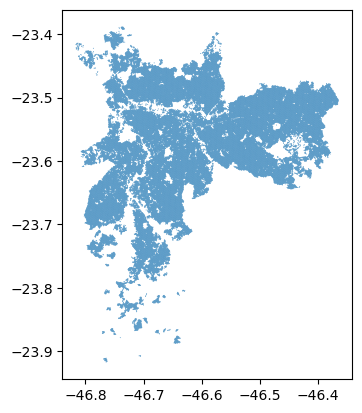

In [78]:
hex_censu_final.plot()

In [79]:
hex_censu_final["D1_012_p"] = hex_censu_final["D1_012_n_sum"]/hex_censu_final["BA_001_n_sum"]
hex_censu_final["D1_017_p"] = hex_censu_final["D1_017_n_sum"]/hex_censu_final["BA_001_n_sum"]
hex_censu_final["D1_035_p"] = hex_censu_final["D1_035_n_sum"]/hex_censu_final["BA_001_n_sum"]
hex_censu_final["D1_044_p"] = hex_censu_final["D1_044_n_sum"]/hex_censu_final["BA_001_n_sum"]


In [81]:
hex_censu_final.to_file("../../data/generate/WGS84_hex_census_2010.gpkg", driver="GPKG")